# Notebook exercise 1

## 1.1

### Assignment

Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.

Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$


3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
$$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
At this point everything becomes clear:
$$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
and finally the statistical uncertainty with $N$ :
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$

### Solution

In order to estimate the integral I used the Pseudo-Random Number Generator (PRNG) I extract $M = 10^6$ random number in the interval $[0,1)$, then I evaluate their mean value and statistical uncertainty with blocking method, in particular I used 100 blocks. In the plot below are reported the mean estimation for the number of block used for estimation, and the trend of progressive error. As I expected the mean value tends to $1/2$ confirming correct functioning of the PRNG.

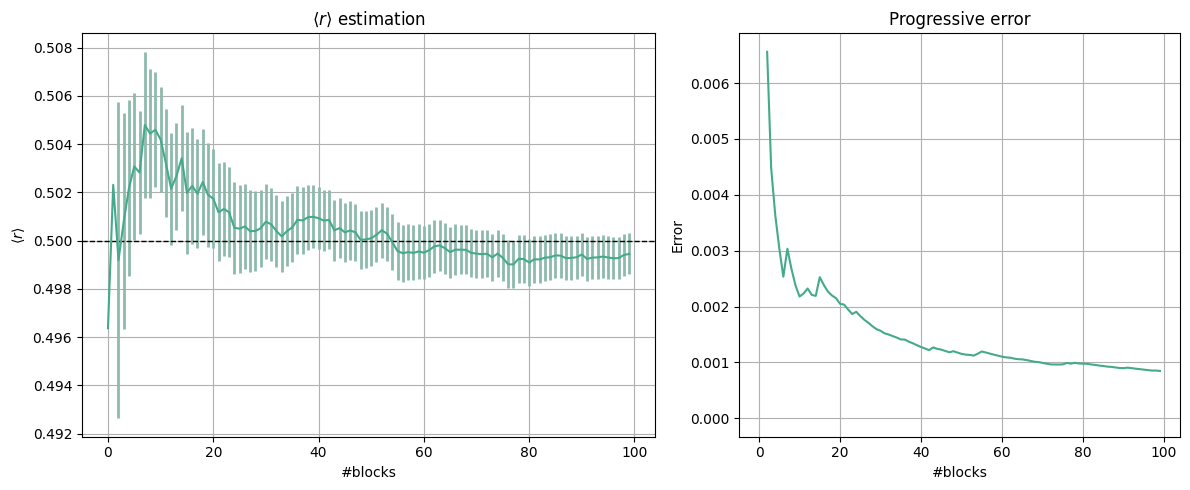

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 

# loading data
r = np.loadtxt("data/1.1_a.dat")
sigma = np.loadtxt("data/1.1_b.dat")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1.3, 1]})  

# plotting integral estimation
axes[0].errorbar(r[:,0],r[:,1], yerr=r[:,2], color='#43AA8B', ecolor='#8EBAAC', elinewidth=2, capsize=0)
axes[0].axhline(y=0.5, color='black', linestyle='--', linewidth=1, label='y=0.5')
axes[0].set_title(r'$\langle r \rangle$ estimation')
axes[0].set_xlabel('#blocks')
axes[0].set_ylabel(r'$\langle r \rangle$')
axes[0].grid(True)

#plotting progressive error
axes[1].plot(r[:,0], r[:,2], color='#43AA8B')
axes[1].set_title(r'Progressive error')
axes[1].set_xlabel('#blocks')
axes[1].set_ylabel(r'Error')
axes[1].grid(True)
plt.tight_layout()

Further confirmation is provided by the estimation of the standard deviation $\sigma$. To evaluate it, I used the same method as for the estimation of $\langle r \rangle$ applying the function $f(x) = (r-1/2)^2$. In this case as well, I obtained the expected result.

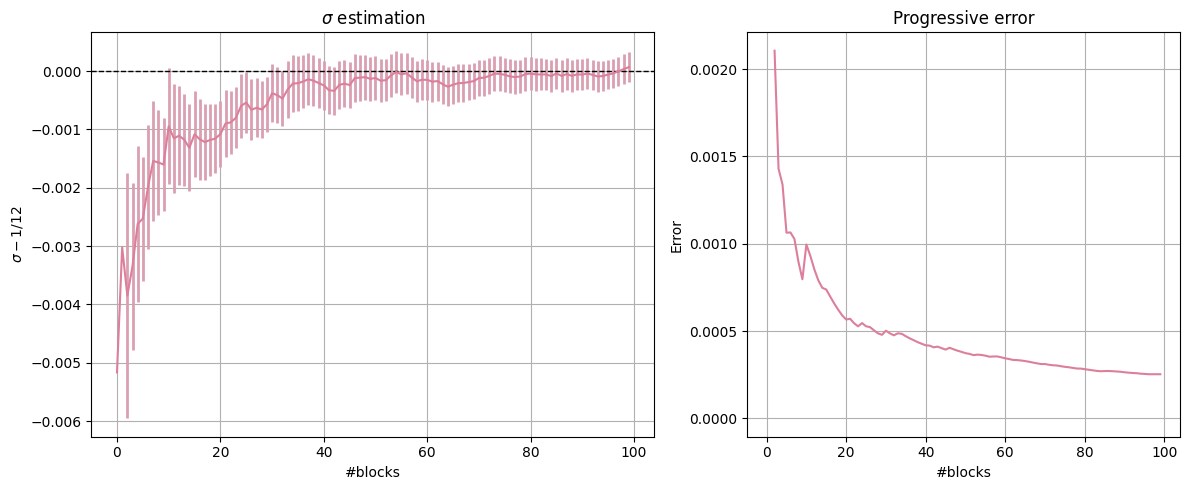

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1.3, 1]})  

# plotting sigma estimation
axes[0].errorbar(sigma[:,0], sigma[:,1]-1/12, yerr=sigma[:,2], color='#DC7F9B', ecolor='#DA9FB1', elinewidth=2, capsize=0)
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1, label='y= 1/12')
axes[0].set_title(r'$\sigma$ estimation')
axes[0].set_xlabel('#blocks')
axes[0].set_ylabel(r'$\sigma - 1/12$')
axes[0].grid(True)

# plotting progressive error
axes[1].plot(sigma[:,0], sigma[:,2], color='#DC7F9B')
axes[1].set_title(r'Progressive error')
axes[1].set_xlabel('#blocks')
axes[1].set_ylabel(r'Error')
axes[1].grid(True)
plt.tight_layout()

In the next figure I plot the $\chi^2$ value and their distribution, obtained like descripted in the assignment. It is also reportend the mean value of $\chi^2$ values which is very similar to the expected value $\chi^2 = 100$. 

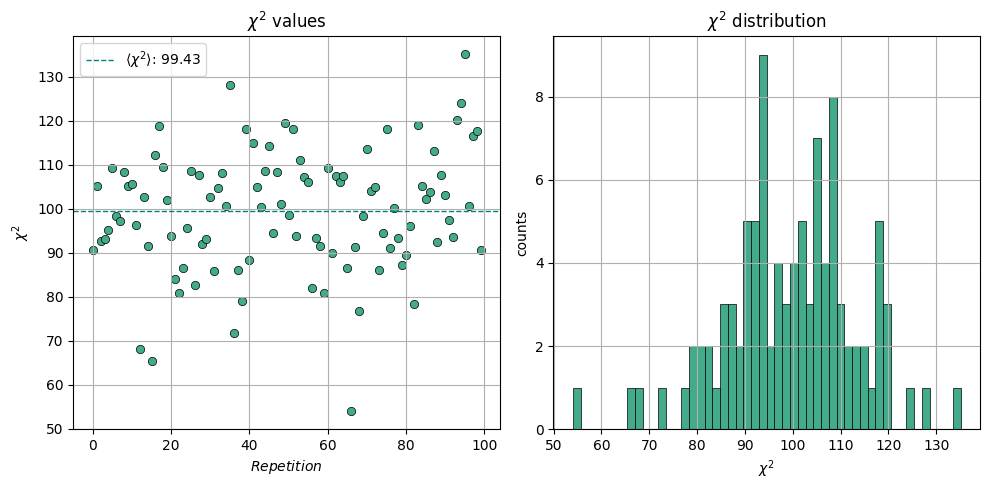

In [14]:
# loading data
chi = np.loadtxt("data/chi.dat")
mean = chi[:,1].mean()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#plotting chi^2 values
ax[0].scatter(chi[:,0], chi[:,1], color='#43AA8B', edgecolor='black', linewidth=0.5)
ax[0].set_title(r'$\chi^2$ values')
ax[0].set_xlabel(r'$Repetition$')
ax[0].set_ylabel(r'$\chi^2$')
ax[0].axhline(y=mean, color='teal', linestyle='--', linewidth= 1,  label=r'$\langle \chi^2 \rangle$'+f': {mean:.2f}')
ax[0].legend()
ax[0].grid(True)

#plotting chi^2 distribution
ax[1].hist(chi[:,1], bins=50, color='#43AA8B', edgecolor='black', linewidth=0.5)
ax[1].set_title(r'$\chi^2$ distribution')
ax[1].set_xlabel(r'$\chi^2$')
ax[1].set_ylabel('counts')
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Es 1.2

### Assignment

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

### Solution

A method to generate a new probability distribution from the uniform distribution is the inversion of the cumulative distribution. Given a probability distribution $p(x)$, the cumulative distribution is defined as $F(x) = \int_{-\infty}^{x} p(x') dx'$. If this function is analytically invertible, it is possible to obtain a random number distributed according to $p(x)$ by evaluating the inverse $F^{-1}$ of a uniformly distributed number.

To sample from the exponential and Cauchy-Lorentz distributions, I calculated the inverse of their cumulative distributions and added two new functions to the PRNG class, which return the mapped value from a uniformly distributed number. The two functions are shown in the figure below.
```c++ 
double Random :: Exp(double lambda){
   // This function generates a random number from an exponential distribution with given lambda
   return -log(1.-Rannyu())/lambda;
}

double Random :: CauchyLorentz(double mu, double gamma){
   // This function generates a random number from a Cauchy-Lorentz distribution with given mu and gamma
   return mu + gamma*tan(M_PI*(Rannyu()-0.5));
}
```

Below, I present the three figures for the different distributions required by the assignment. Each figure contains four histograms corresponding to different realizations of $S_N$. The number of summed random variables $N$ is indicated in the title of each plot. 

It is interesting to note that as $N$ increases the histograms for the uniform and exponential distributions tend to a Gaussian shape, as expected from the Central Limit Theorem (CLT). For the Cauchy-Lorentz distribution the histogram retains the shape of a Cauchy distribution, due to the fact that its second moment is not finite, as required by the CLT.

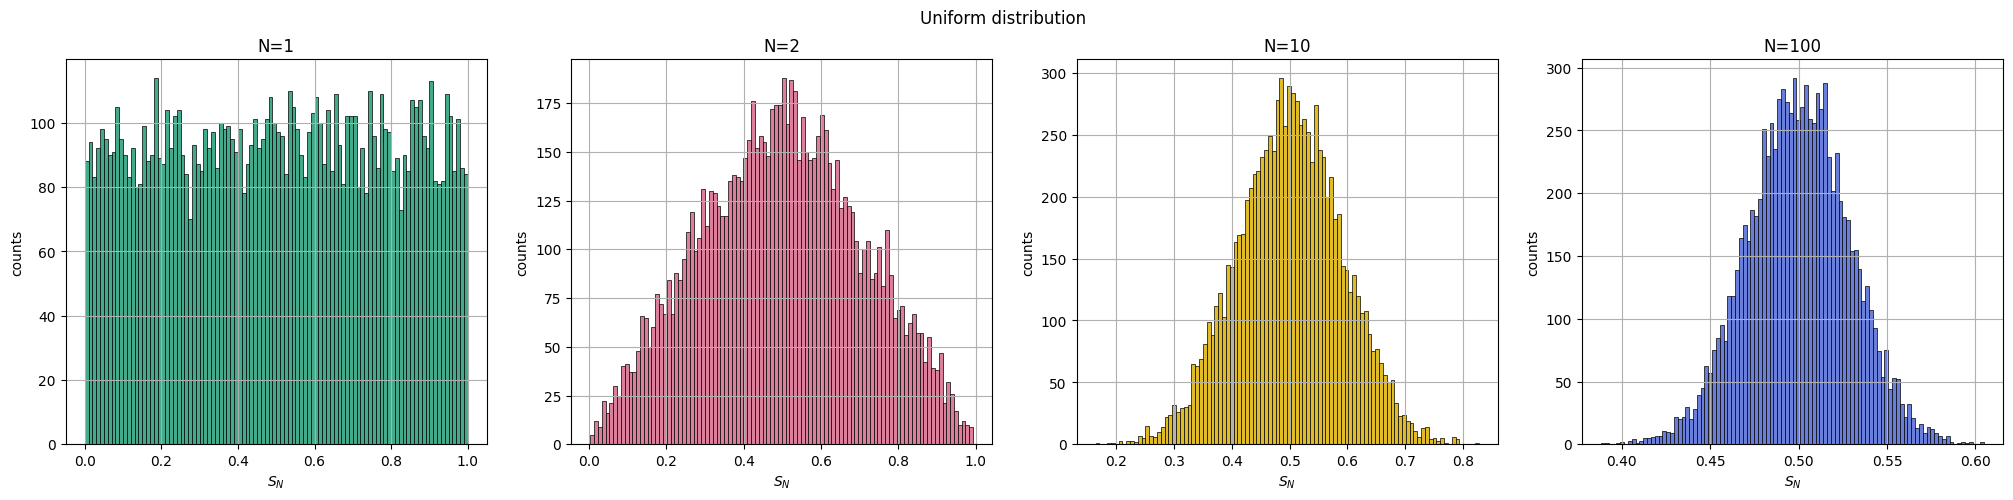

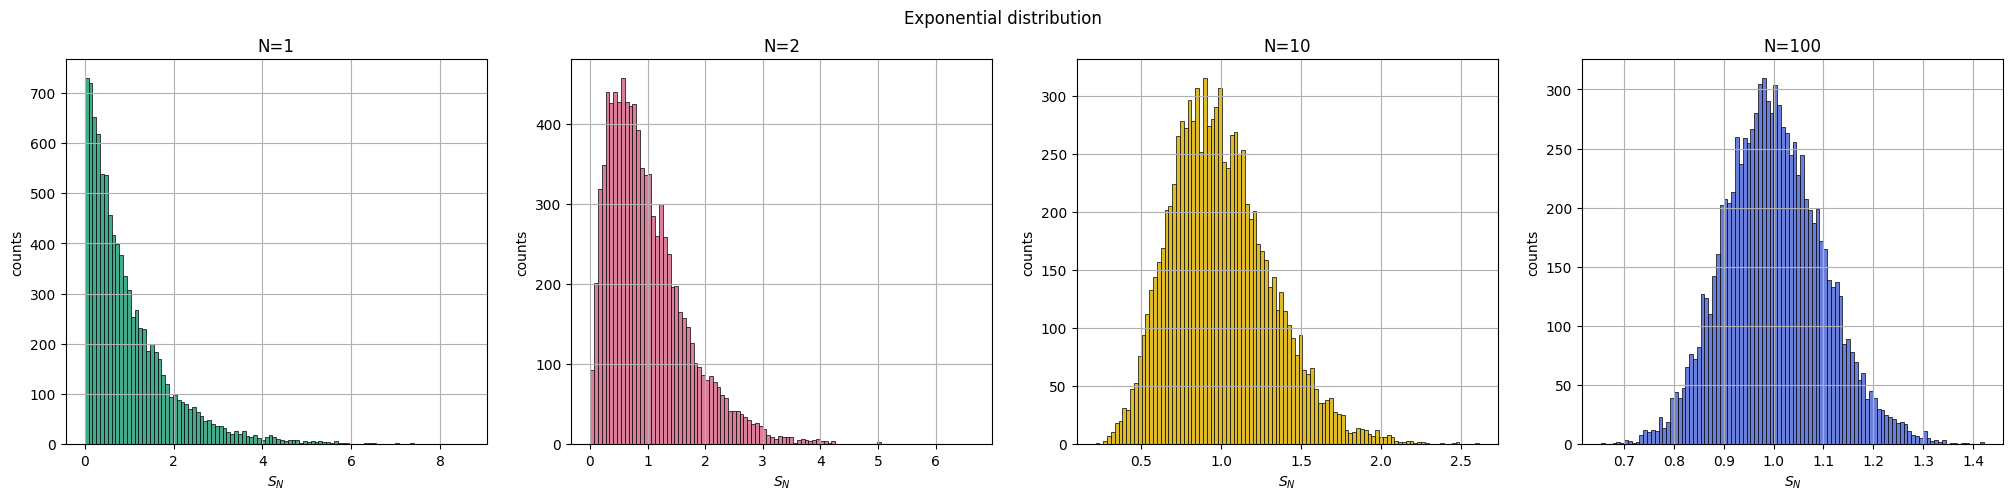

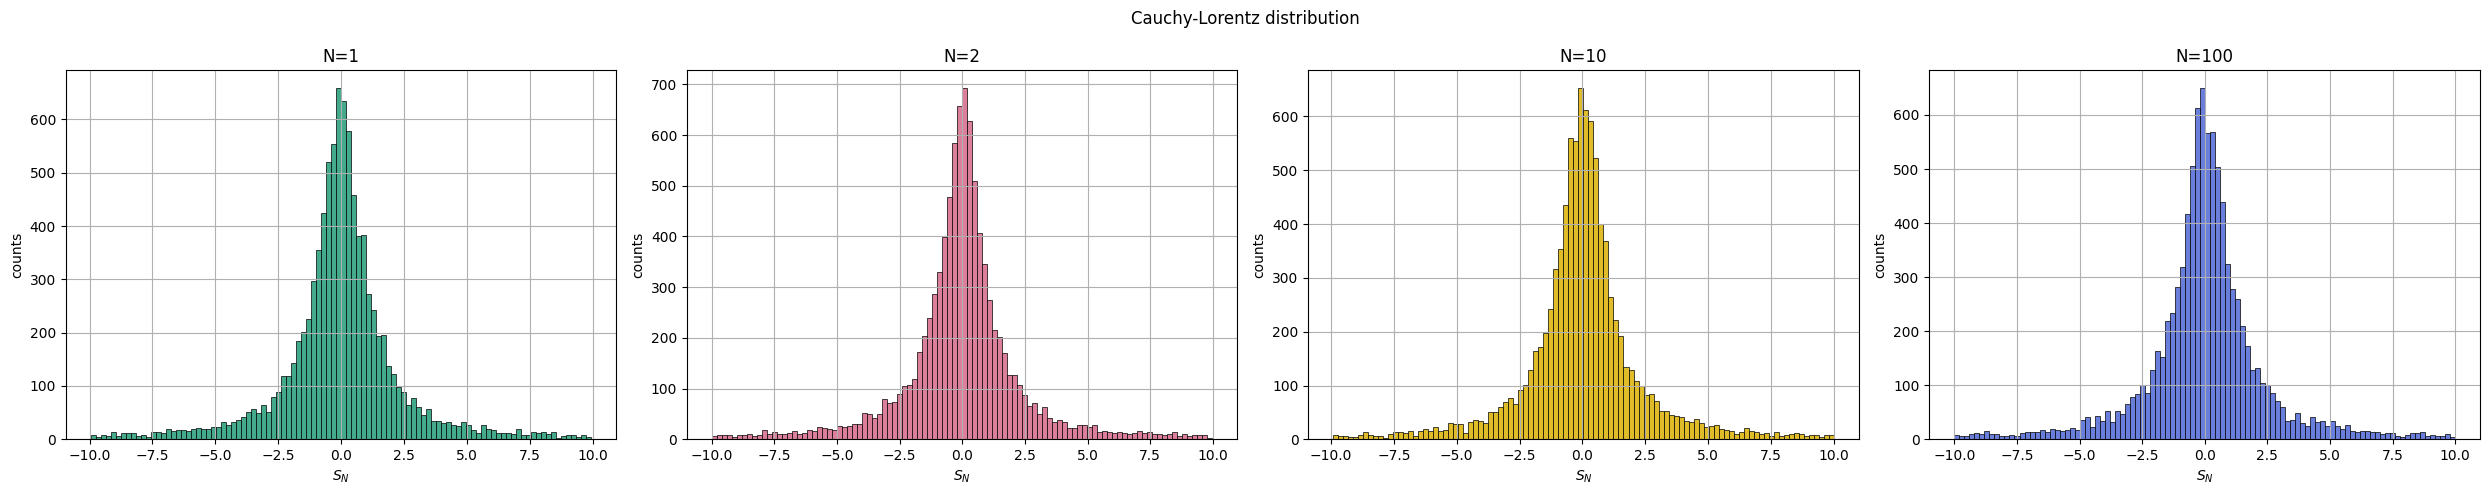

In [ ]:
#loading data form Nfile
filenames = ["data/N1.dat", "data/N2.dat", "data/N10.dat", "data/N100.dat"]
data = [np.loadtxt(filename) for filename in filenames]
#filtering the data for Cauchy distribution
for i in range(len(data)):
    for j in range(1, 4):  
        data[i] = data[i][np.abs(data[i][:, j]) <= 10]

#plotting the histograms
fig_names = ["Uniform distribution", "Exponential distribution", "Cauchy-Lorentz distribution"]
ax_names = ["N=1", "N=2", "N=10", "N=100"]
colors = ['#43AA8B', '#DC7F9B', '#E1BC29', '#6A7FDB']
for j in range (3):
    fig, axes = plt.subplots(1, 4, figsize=(25, 5))
    fig.suptitle(fig_names[j])
    for i in range(4):
        axes[i].hist(data[i][:,j+1], bins=100, color=colors[i], edgecolor='black', linewidth=0.5)
        axes[i].set_xlabel(r'$S_N$')
        axes[i].set_ylabel('counts')
        axes[i].set_title(ax_names[i])
        axes[i].grid(True)

plt.tight_layout()

Finally, I fit the last $S_N$ distribution with both a Gaussian and a Cauchy function to assess their compatibility.

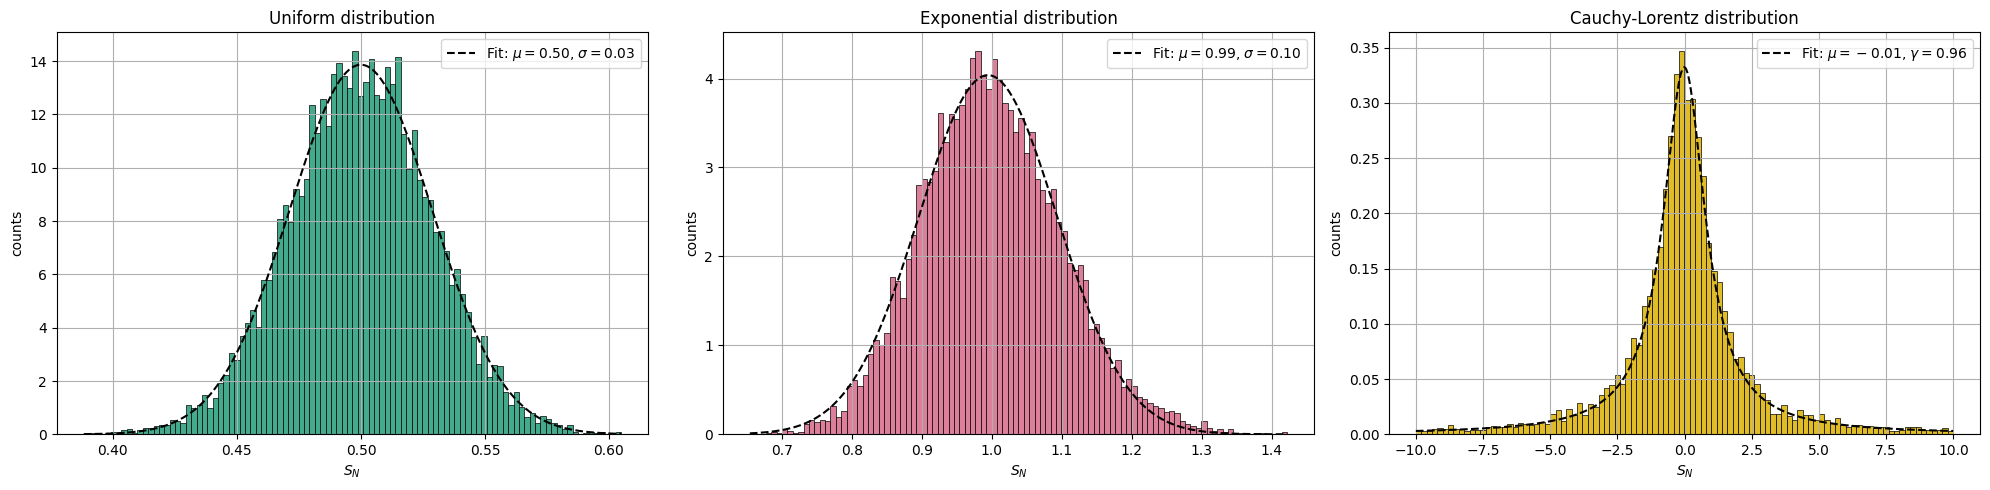

In [ ]:
from scipy.optimize import curve_fit

def gauss(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

def cauchy(x, mu, gamma):
    return 1/np.pi*gamma/((x-mu)**2+gamma**2)

colors = ['#43AA8B', '#DC7F9B', '#E1BC29', '#6A7FDB']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i in range(2):
    # fitting the histograms for the uniform and exponential distributions
    counts, bin_edges = np.histogram(data[3][:, i+1], bins=100, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    popt, pcov = curve_fit(gauss, bin_centers, counts, p0=[0, 1])
    mu, sigma = popt

    # plotting the histograms and the fit
    axes[i].hist(data[3][:, i+1], bins=100, color=colors[i], edgecolor='black', linewidth=0.5, density=True)
    x_fit = np.linspace(bin_edges[0], bin_edges[-1], 1000)
    y_fit = gauss(x_fit, mu, sigma)
    axes[i].plot(x_fit, y_fit, color='black', linewidth=1.5, linestyle='--', label=f'Fit: $\mu={mu:.2f}$, $\sigma={sigma:.2f}$')
    axes[i].set_xlabel(r'$S_N$')
    axes[i].set_ylabel('counts')
    axes[i].set_title(fig_names[i])
    axes[i].grid(True)
    axes[i].legend()

# fitting the cauchy-lorentz distribution
counts, bin_edges = np.histogram(data[3][:, 3], bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
popt, pcov = curve_fit(cauchy, bin_centers, counts, p0=[0, 1])
mu, gamma = popt    

# plotting the histogram and the fit for cauchy-lorentz distribution
axes[2].hist(data[3][:, 3], bins=100, color=colors[2], edgecolor='black', linewidth=0.5, density=True)
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 1000)
y_fit = cauchy(x_fit, mu, gamma)        
axes[2].plot(x_fit, y_fit, color='black', linewidth=1.5, linestyle='--', label=f'Fit: $\mu={mu:.2f}$, $\gamma={gamma:.2f}$')
axes[2].set_xlabel(r'$S_N$')
axes[2].set_ylabel('counts')
axes[2].set_title(fig_names[2])
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

## 01.3

### Assignment

**Simulate** the Buffon’s experiment:  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$. If possible, do not use $\pi$ to evaluate $\pi$.

### Solution

An easy way to simulate Buffon's experiment is to generate the two ends of the needle, $x_1$ and $x_2$, and check the condition $\left\lfloor \frac{x_1}{d} \right\rfloor \not = \left\lfloor \frac{x_2}{d} \right\rfloor$. When this condition is satisfied, it means that the needle has crossed one of the lines.

The challenging part is to generate the two points with the correct distributions without using $\pi$.
To achieve this, I exploit the Cauchy-Lorentz distribution. I generate two numbers: $x_1 \in [0, L_{table})$ from a uniform distribution, and $T$ from a Cauchy-Lorentz distribution with $x_0 = 0$ and $\gamma = y_1 = 1$, where the value of $y_1$ is not important due to the symmetry of the problem. The coordinate $x_2$ is then given by $x_2 = x_1 + \frac{T L}{\sqrt{y_1^2 + T^2}}$. 
Once you have the number of the crossing needle $N_{hit}$, it is possible to evaluate the estimate $\pi$. 

In the figure below, I report the estimate of $\pi$ obtained using the blocking method.

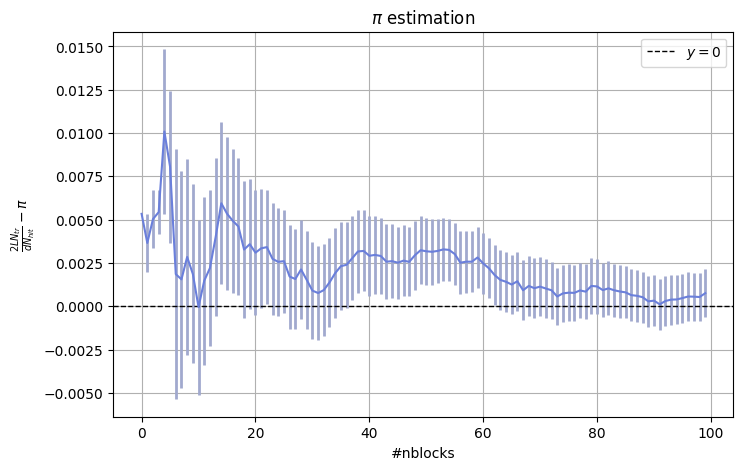

In [12]:
#loading data
pi = np.loadtxt("data/pi.dat") 

fig, axes = plt.subplots(1, 1, figsize=(8, 5))  

#plotting pi estimation
axes.errorbar(pi[:,0], pi[:,1]-np.pi, yerr=pi[:,2], color=colors[3], ecolor='#A1A9CE', elinewidth=2, capsize=0)
axes.axhline(y=0, color='black', linestyle='--', linewidth=1, label=r'$y = 0$')
axes.set_title(r'$\pi$ estimation')
axes.set_xlabel('#nblocks')
axes.set_ylabel(r'$\frac{2 L N_{tr}}{d N_{hit}} - \pi$')
axes.legend()
axes.grid(True)